## Reading In All Necessary Libraries

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
import shap
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.decomposition import PCA


## Reading in the Data

In [18]:
df = pd.read_csv("Tachycardia.txt", delimiter=" ")

In [19]:
X = df.drop(['DIABETES', 'BPMEDS', 'PERIOD', 'RANDID', 'CURSMOKE'], axis = 1)
y = df['DIABETES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=307)

df

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PERIOD
0,6238,2,250,46,121.0,81.0,0,28.73,0,0,95,76,1
1,6238,2,260,52,105.0,69.5,0,29.43,0,0,80,86,2
2,6238,2,237,58,108.0,66.0,0,28.50,0,0,80,71,3
3,11263,2,228,43,180.0,110.0,0,30.30,0,0,77,99,1
4,11263,2,230,49,177.0,102.0,0,31.36,0,1,120,86,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,9967157,1,239,64,117.0,81.0,0,24.86,0,0,75,82,2
5198,9967157,1,274,70,130.0,77.0,0,25.16,0,0,80,93,3
5199,9969773,2,260,50,190.0,130.0,0,43.67,1,0,85,260,1
5200,9969773,2,285,56,202.0,115.0,0,42.70,1,0,100,163,2


## Exploratory Data Analysis

<Axes: xlabel='SYSBP', ylabel='DIABP'>

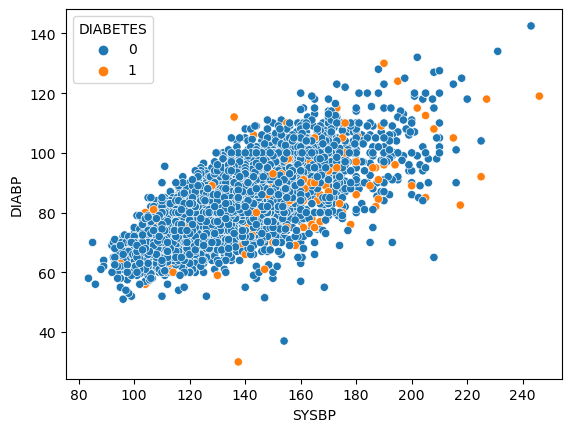

In [20]:
sns.scatterplot(data = df, x = "SYSBP", y = "DIABP", hue = "DIABETES")

<Axes: xlabel='DIABETES', ylabel='AGE'>

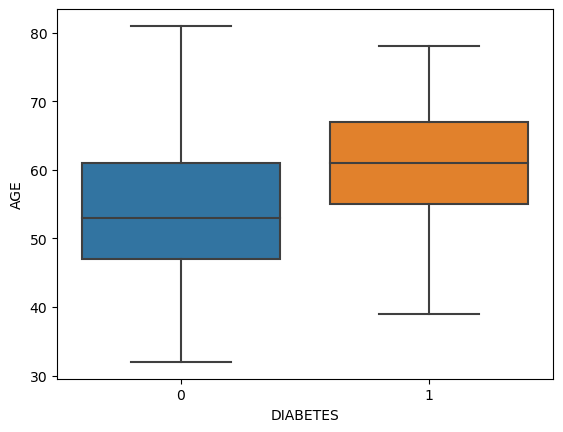

In [21]:
sns.boxplot(data = df, x = "DIABETES", y = "AGE")

<Axes: xlabel='DIABETES', ylabel='TOTCHOL'>

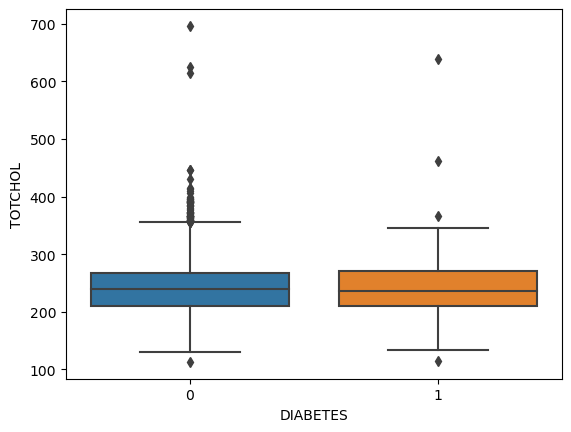

In [22]:
sns.boxplot(data=df, x = 'DIABETES', y = 'TOTCHOL')

<Axes: xlabel='DIABETES', ylabel='HEARTRTE'>

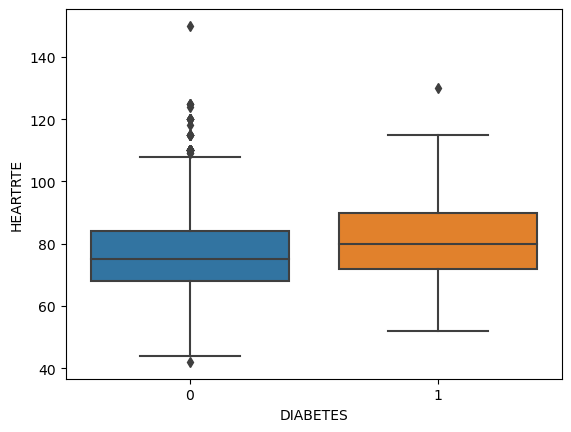

In [23]:
sns.boxplot(data=df, x = 'DIABETES', y = 'HEARTRTE')

<Axes: xlabel='DIABETES', ylabel='GLUCOSE'>

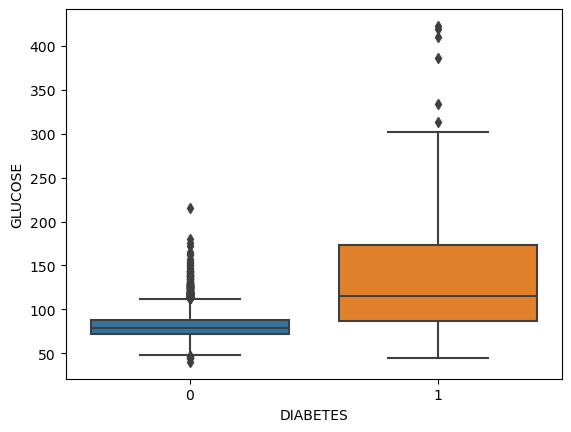

In [24]:
sns.boxplot(data=df, x = 'DIABETES', y = 'GLUCOSE')

In [47]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9769408147578785


In [35]:
base_estimator = DecisionTreeClassifier(max_depth=1)

adaboost_classifier = AdaBoostClassifier(estimator=base_estimator)

adaboost_classifier.fit(X_train, y_train)

y_pred = adaboost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.973097617217525


In [37]:
gb_classifier = GradientBoostingClassifier()

gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9738662567255957


In [39]:
hgboost_classifier = HistGradientBoostingClassifier()

hgboost_classifier.fit(X_train, y_train)

y_pred = hgboost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9761721752498078


In [43]:
rf = RandomForestClassifier()

param_dist = {
    'n_estimators': randint(50, 200),  # Randomly sample between 50 and 200
    'max_depth': [None, 10, 20],  # Choose from these values
    'min_samples_split': randint(2, 10),  # Randomly sample between 2 and 10
    'min_samples_leaf': randint(1, 5),  # Randomly sample between 1 and 5
    'max_features': ['sqrt', 'log2'],  # Choose from these options
    'bootstrap': [True, False],  # Choose between True and False
    'class_weight': [None, 'balanced']  # Choose between None and 'balanced'
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Fit RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Best Hyperparameters: {'bootstrap': True, 'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 111}
Accuracy: 0.9777094542659492


In [46]:
rf_classifier = RandomForestClassifier(bootstrap=True, max_depth=10, max_features= 'sqrt', min_samples_leaf=4, min_samples_split=8, n_estimators=111)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9769408147578785


In [49]:
pca = PCA(n_components=1)

X_2d = pca.fit_transform(X)